In [36]:
from env import host, username, password
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from datetime import date
import nick_wrangle as get

## Questions to Explore
* Which products are most profitable?
* Which products had outstanding sales volumes? 
* Does product type vary by customer/region? 

### Bear in Mind
## Each of these Sales are on U.S. territory
So we can apply our knowledge of major sales days or trends in months 
##### Take for example: 
* January 1st New Year's Day Sales (typically runs for 2-4 days) 
* President's Day (3rd Monday of February)
* Memorial Day (Last Monday in May)
* Jun 21st Amazon Prime Day
* July 4th Independence Day
* August 8th National Bargain Hunting Week
* Labor Day (1st Monday in September)
* Columbus Day (1st Monday in October)
* Oct 12 Fair Trade Month
* November 25th-ish Black Friday (the day after Thanksgiving)
* November 28th-ish Cyber Monday (Monday following Black Friday)

We can anticipate these days will have discounts applied. Perhaps sometimes excessively, other times maybe less competitively than needed. 

##### Speaking of Competition
For certain products, months such as March Madness (and the beginning of the year more generally) as well as October represent tremendous opportunities
for sales fluctuations in accordance with marketing trends as they pertain to sports. 

In [37]:
train, test = get.wrangle_superstore()

Using cached CSV
Using cached CSV


/Users/nicholasdougherty/codeup-data-science/superstore/nick_wrangle.py:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


In [93]:
# While moving through exploration, I ran into a duplicated index error. This will cause problems down the line. 
# Let's see if duplicates exist in both indexes
train.index.is_unique
test.index.is_unique
# Both are false. Not good. 
train.index.duplicated().sum()
# half the dates are duplicated. 

830

In [94]:
train.shape

(1238, 23)

In [3]:
train

,month,year,region_name,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,...,product_name,category,sub_category,days_bw_shipment,quantity,discount,profit,profit_per_product,sales,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,January,2014,Central,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,Avery 508,Office Supplies,Labels,4 days,3.0,0.2,4.2717,1.4239,11.784,3.928
2014-01-04,January,2014,Central,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,SAFCO Boltless Steel Shelving,Office Supplies,Storage,4 days,3.0,0.2,-64.7748,-21.5916,272.736,90.912
2014-01-04,January,2014,Central,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,4 days,2.0,0.8,-5.4870,-2.7435,3.540,1.770
2014-01-09,January,2014,Central,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,...,Memorex Micro Travel Drive 8 GB,Technology,Accessories,4 days,3.0,0.2,9.7500,3.2500,31.200,10.400
2014-01-09,January,2014,Central,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,...,Newell 312,Office Supplies,Art,4 days,2.0,0.2,1.1680,0.5840,9.344,4.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-24,December,2016,South,OFF-ST-10003716,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,...,Tennsco Double-Tier Lockers,Office Supplies,Storage,4 days,3.0,0.2,-47.2542,-15.7514,540.048,180.016
2016-12-24,December,2016,South,OFF-BI-10001575,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,...,GBC Linen Binding Covers,Office Supplies,Binders,4 days,3.0,0.7,-20.4468,-6.8156,27.882,9.294
2016-12-26,December,2016,West,OFF-PA-10003673,FP-14320,US-2016-153129,2016-12-30,Standard Class,Consumer,Seattle,...,Strathmore Photo Mount Cards,Office Supplies,Paper,4 days,5.0,0.0,15.5940,3.1188,33.900,6.780


In [4]:
# Checking for time gaps in the data:
print('Time gaps for Train:')
print('Number of rows:', train.index.nunique())
n_days = train.index.max() - train.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

print('')
print('Time gaps for Test:')
print('Number of rows:', test.index.nunique())
n_days = test.index.max() - test.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Time gaps for Train:
Number of rows: 408
Number of days between first and last day: 1093 days 00:00:00

Time gaps for Test:
Number of rows: 162
Number of days between first and last day: 364 days 00:00:00


As we can see, the time gaps present among our index indicates that the current datetime data is not continuous, which can be tricky to work with. 
To resolve these temporal discrepancies, we will use the average daily sales values per month instead, using the start of each month as the timestamp. 
A resampling is in order. 

If the outcomes are desirable, then we can apply the same resampling method to the validate and test sets as well. 

In [5]:
train_monthly = pd.DataFrame(train['sales'].resample('MS').mean())

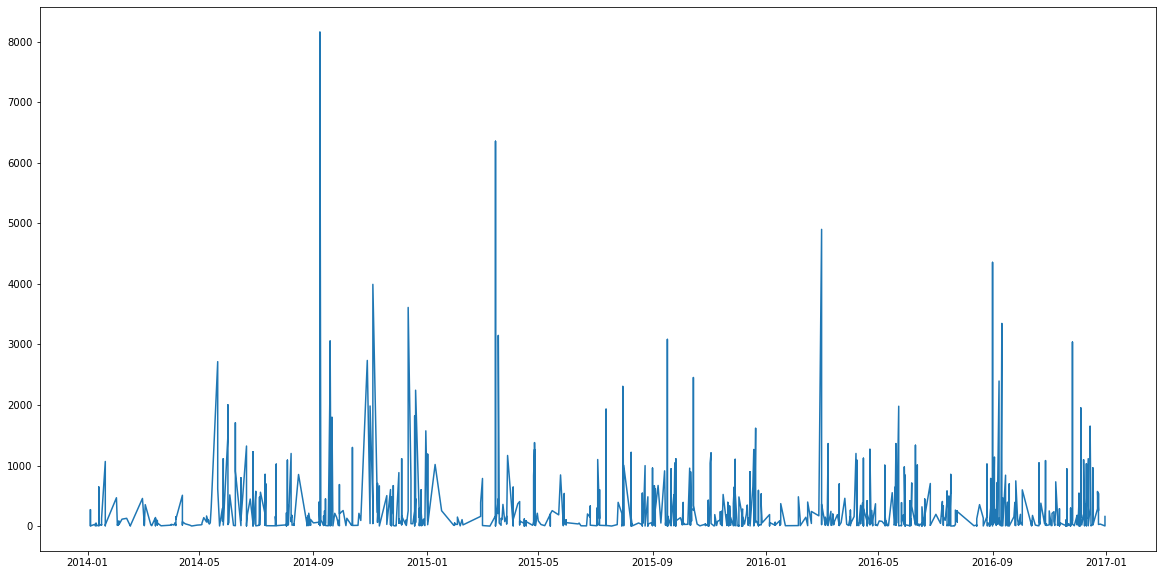

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
# without sampling
plt.plot(train.index, train.sales)

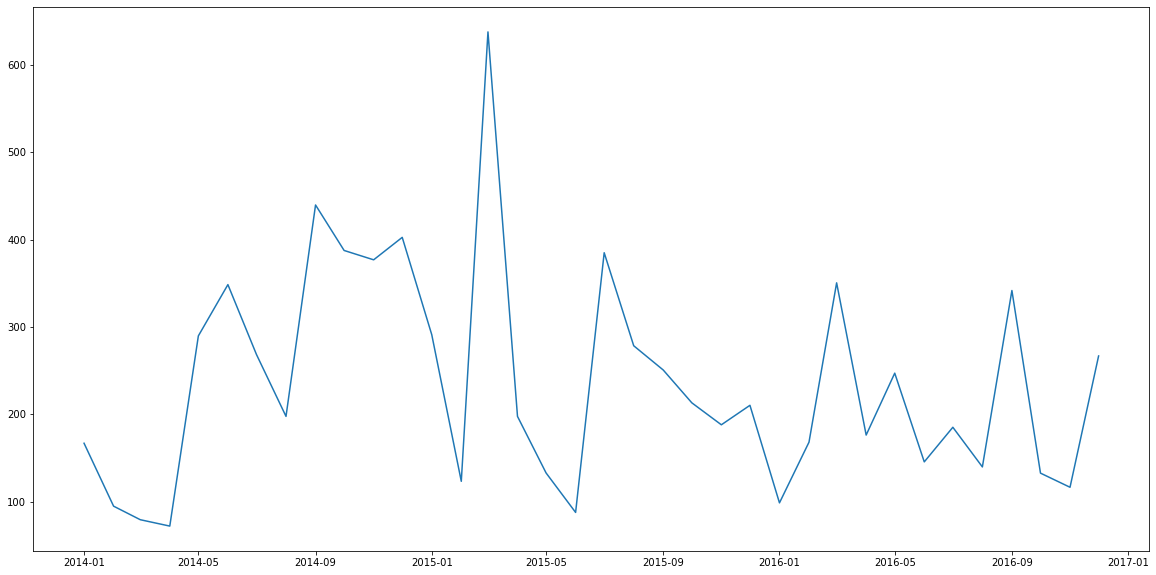

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
# with sampling
plt.plot(train_monthly.index, train_monthly.sales)

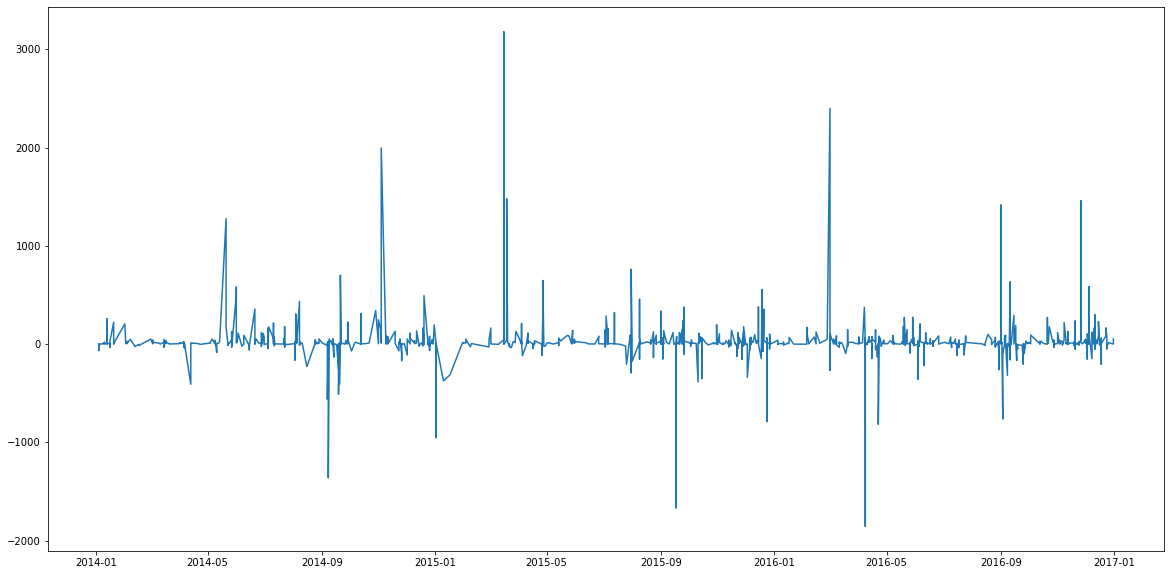

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
# without resampling
plt.plot(train.index, train.profit)

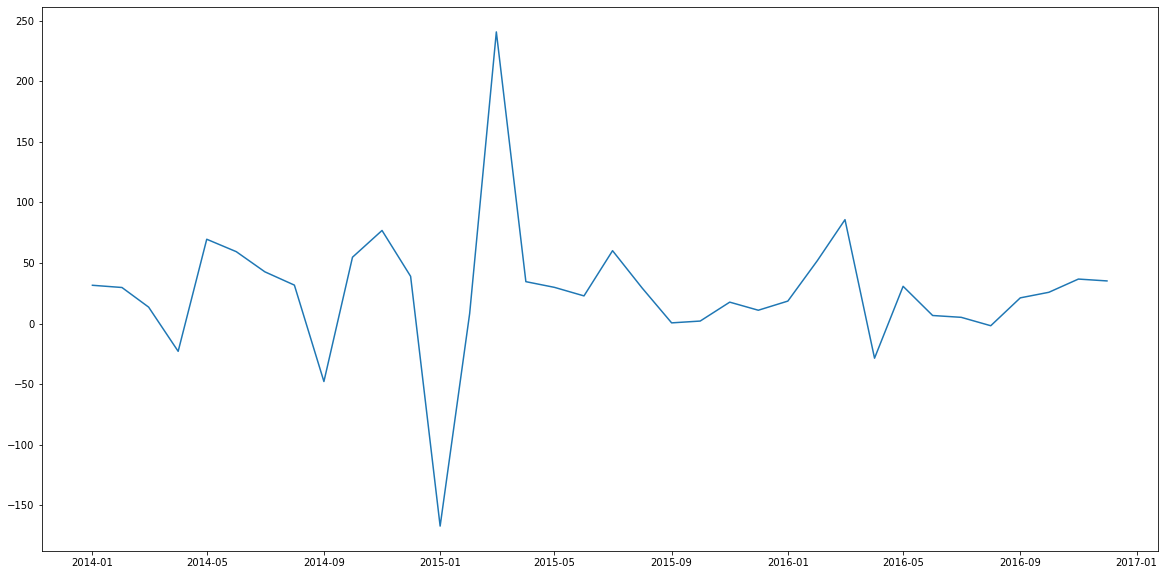

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
train_monthly_profit = pd.DataFrame(train['profit'].resample('MS').mean())
# after resampling
plt.plot(train_monthly_profit.index, train_monthly_profit.profit)

This certainly comes with its visual advantages, minus the current illegibility of the X-axis. However, because the shape is reduced substantially,
the manners of appending it to the dataframe may present some difficulties. Regardless, I will keep this in mind and run it by Matt to consider what to do 
with this approach, if anything.

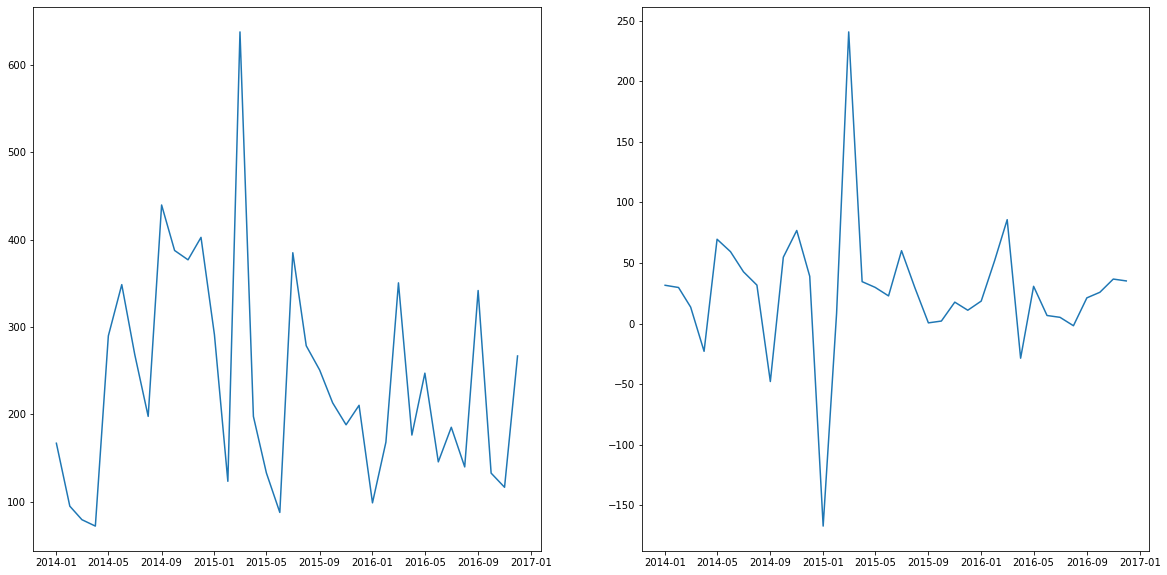

In [10]:
# Resampled Side by Side
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1, 2, 1)
plt.plot(train_monthly.index, train_monthly.sales)
plt.subplot(1, 2, 2)
plt.plot(train_monthly_profit.index, train_monthly_profit.profit)

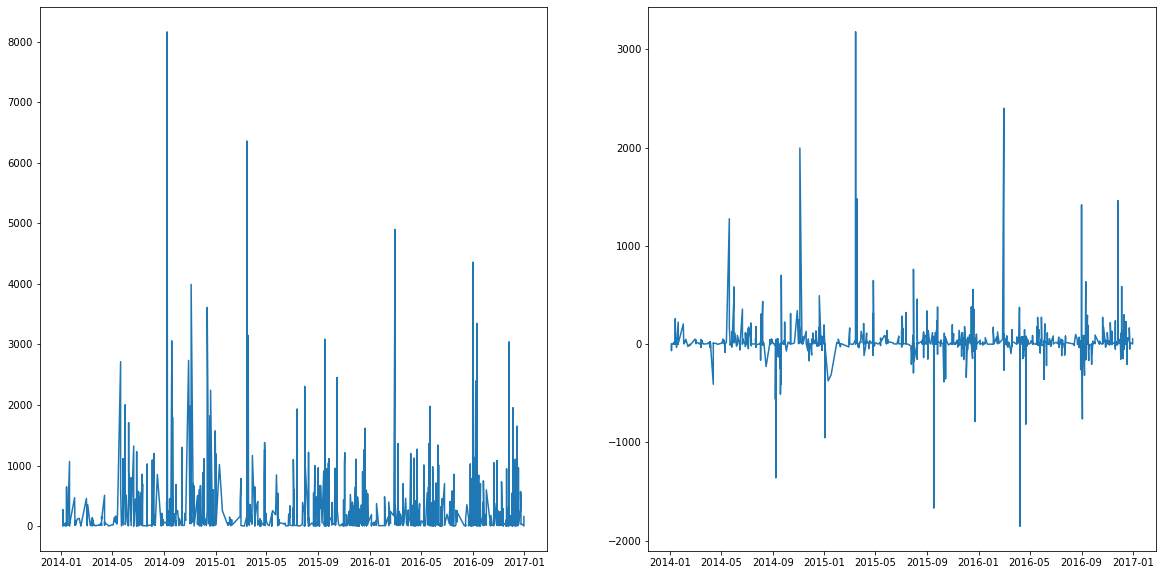

In [11]:
# unsampled side by side
plt.subplot(1, 2, 1)
plt.plot(train.index, train.sales)
plt.subplot(1, 2, 2)
plt.plot(train.index, train.profit)

<AxesSubplot:ylabel='Frequency'>

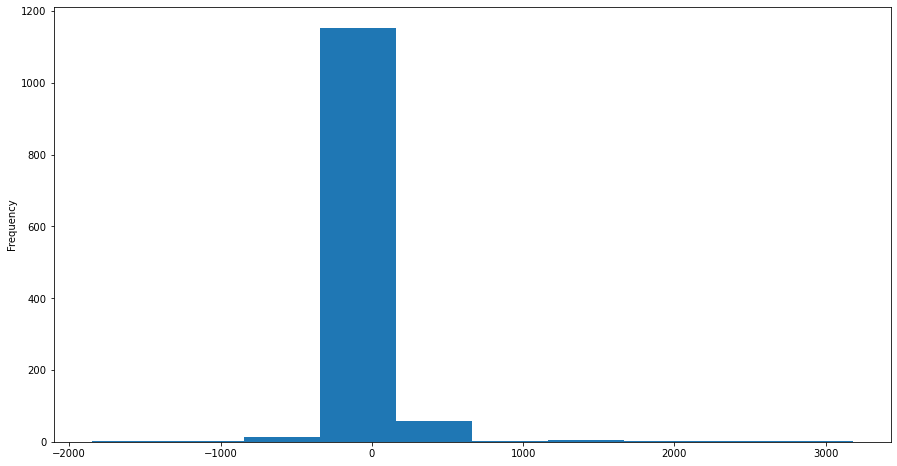

In [12]:
plt.rcParams["figure.figsize"] = (15,8)
y = train.profit
y.plot.hist()

[Text(0.5, 1.0, 'Average Profit by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Gains or Losses')]

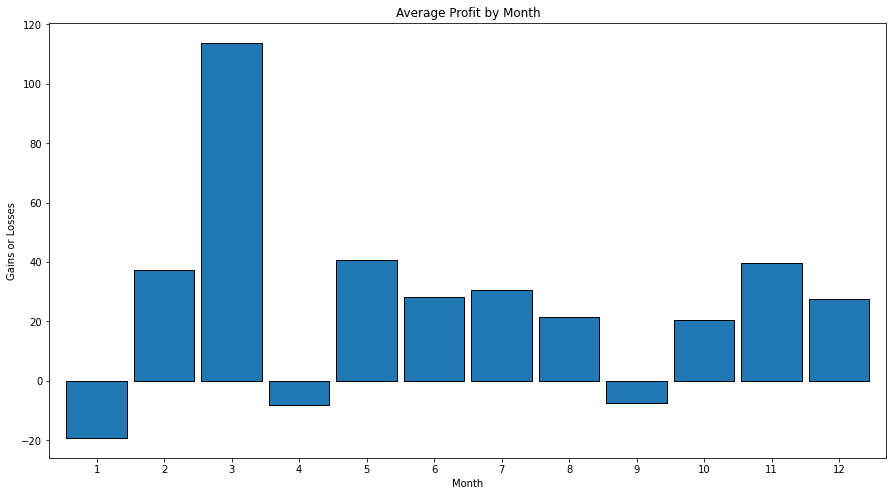

In [14]:
plt.rcParams["figure.figsize"] = (15,8)
# kind of reminds me of the way log-error was distributed in the zillow data set
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Month', xlabel='Month', ylabel='Gains or Losses')

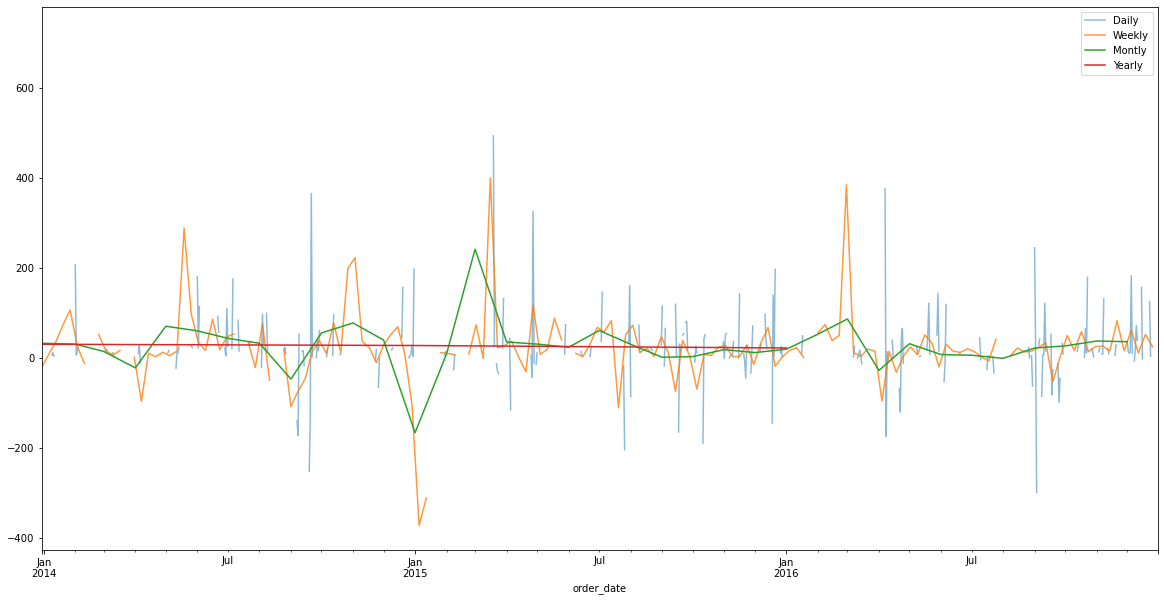

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

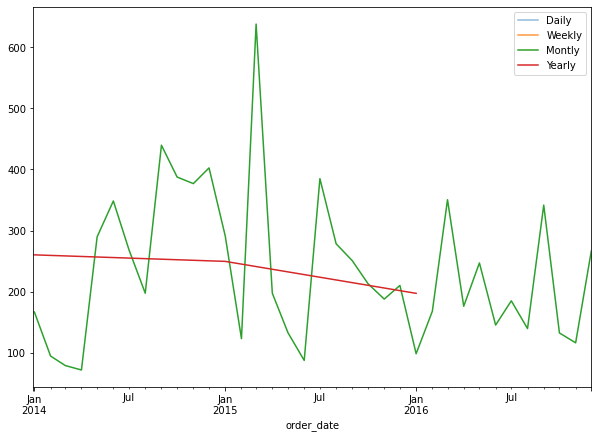

In [16]:
# what about resampling some samples, lol?
y = train_monthly.sales
plt.rcParams["figure.figsize"] = (10,7)
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [36]:
# not very useful.

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

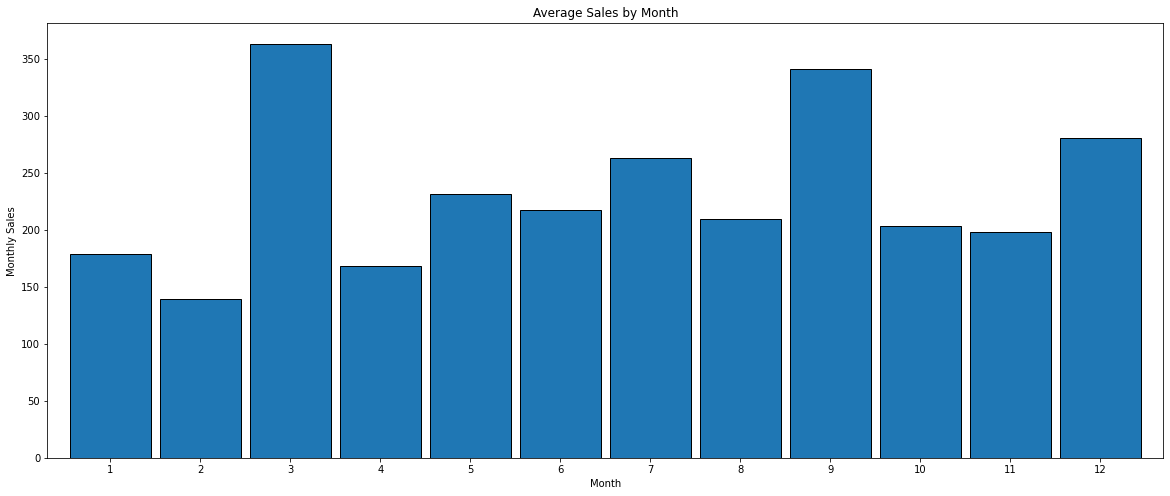

In [17]:
# Addressing the VP's concerns can go many ways, we could focus on the months 
# which have the highest amount of profit to observe which products were most popular
# and then emphasize those, or focus on improving the image of products which are 
# causing us to lose profit, either as a result of discounts or perhaps of contestable
# pricing. 
plt.rcParams["figure.figsize"] = (20,8)
y2 = train.sales

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Monthly Sales')

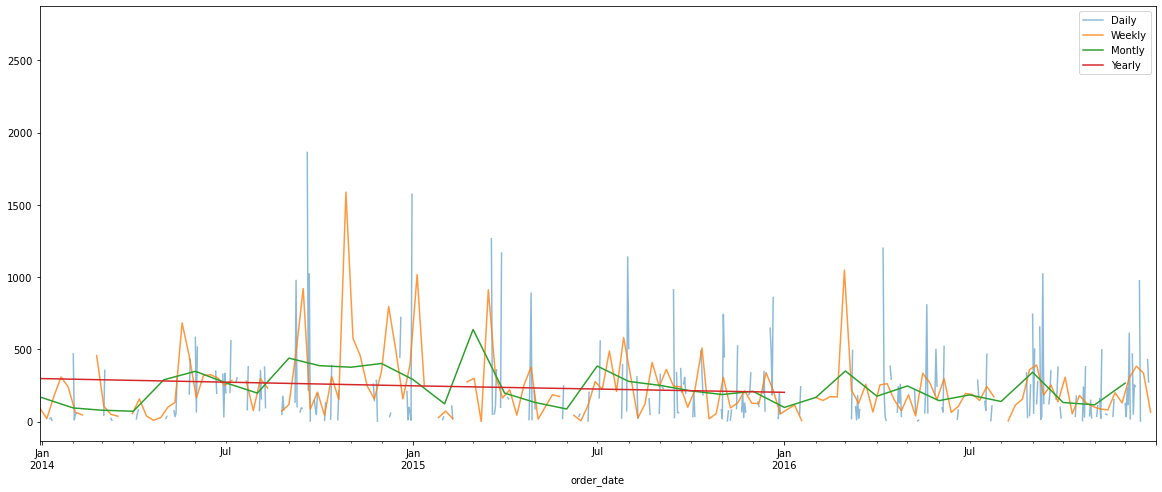

In [18]:
plt.rcParams["figure.figsize"] = (20,8)
y2.resample('D').mean().plot(alpha=.5, label='Daily')
y2.resample('W').mean().plot(alpha=.8, label='Weekly')
y2.resample('M').mean().plot(label='Montly')
y2.resample('Y').mean().plot(label='Yearly')
plt.legend()

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

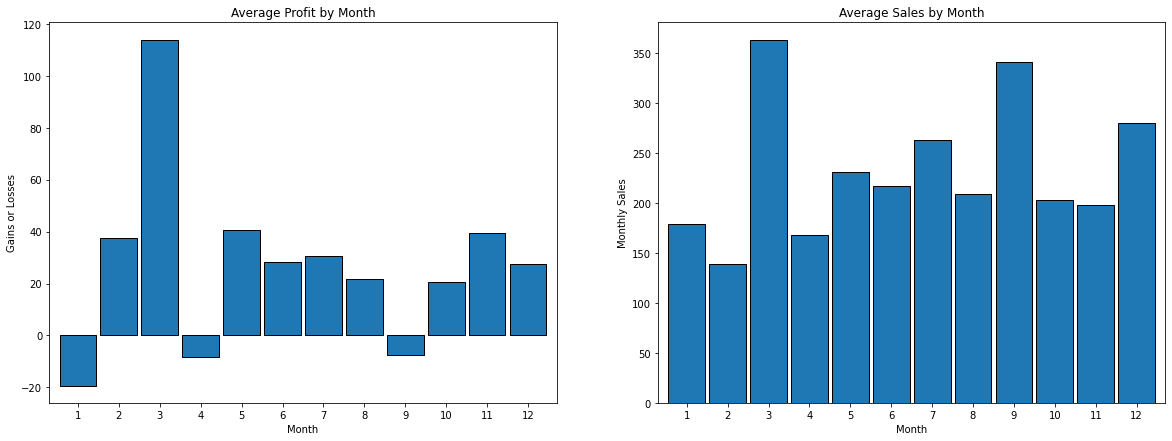

In [19]:
# It'll be easier to see these two side by side. 
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = train.profit

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Month', xlabel='Month', ylabel='Gains or Losses')

plt.subplot(1, 2, 2)
y2 = train.sales

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Monthly Sales')

In [20]:
# Sorted profit_per_product in train in descending order
top_profit = train.sort_values(by='profit_per_product', ascending=False, na_position='last')
top_50_profitable_items = top_profit.head(50)
top_50_df = pd.DataFrame(top_50_profitable_items)
top_50_df

,month,year,region_name,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,...,product_name,category,sub_category,days_bw_shipment,quantity,discount,profit,profit_per_product,sales,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-11-04,November,2014,East,TEC-MA-10002927,NM-18445,CA-2014-164973,2014-11-09,Standard Class,Home Office,New York City,...,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,Technology,Machines,5 days,2.0,0.0,1995.9900,997.9950,3991.980,1995.990
2015-03-16,March,2015,South,OFF-BI-10003527,CM-12385,CA-2015-145352,2015-03-22,Standard Class,Consumer,Atlanta,...,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,6 days,5.0,0.0,3177.4750,635.4950,6354.950,1270.990
2016-09-01,September,2016,East,OFF-BI-10004995,AB-10060,CA-2016-129714,2016-09-03,First Class,Home Office,New York City,...,GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,2 days,4.0,0.2,1415.4296,353.8574,4355.168,1088.792
2016-03-01,March,2016,East,TEC-MA-10003979,KD-16270,US-2016-143819,2016-03-05,Standard Class,Consumer,Yonkers,...,Ativa V4110MDD Micro-Cut Shredder,Technology,Machines,4 days,7.0,0.0,2400.9657,342.9951,4899.930,699.990
2014-09-21,September,2014,West,TEC-CO-10002313,JG-15115,US-2014-135972,2014-09-23,Second Class,Consumer,Des Moines,...,Canon PC1080F Personal Copier,Technology,Copiers,2 days,3.0,0.0,701.9883,233.9961,1799.970,599.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-05,July,2014,South,TEC-AC-10003911,MC-17845,CA-2014-157784,2014-07-08,First Class,Consumer,Jackson,...,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Router,Technology,Accessories,3 days,3.0,0.0,163.1898,54.3966,479.970,159.990
2015-09-26,September,2015,Central,TEC-PH-10001760,SC-20725,US-2015-161991,2015-09-28,Second Class,Consumer,Houston,...,Bose SoundLink Bluetooth Speaker,Technology,Phones,2 days,7.0,0.2,376.1100,53.7300,1114.400,159.200
2015-04-04,April,2015,Central,OFF-AP-10003849,NC-18340,CA-2015-112452,2015-04-04,Same Day,Consumer,Lansing,...,Hoover Shoulder Vac Commercial Portable Vacuum,Office Supplies,Appliances,0 days,2.0,0.1,107.3460,53.6730,644.076,322.038


In [21]:
# Sorted profit_per_product in train in ascending order
least_profit = train.sort_values(by='profit_per_product', ascending=True, na_position='last')
least_50_profitable_items = least_profit.head(50)
least_50_df = pd.DataFrame(least_50_profitable_items)
least_50_df

,month,year,region_name,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,...,product_name,category,sub_category,days_bw_shipment,quantity,discount,profit,profit_per_product,sales,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2016-04-08,April,2016,Central,OFF-BI-10004995,ZC-21910,CA-2016-130946,2016-04-12,Standard Class,Consumer,Houston,...,GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,4 days,4.0,0.8,-1850.9464,-462.7366,1088.792,272.198
2015-09-17,September,2015,East,FUR-BO-10004834,TB-21520,US-2015-150630,2015-09-21,Standard Class,Consumer,Philadelphia,...,"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",Furniture,Bookcases,4 days,7.0,0.5,-1665.0522,-237.8646,3083.430,440.490
2014-09-19,September,2014,Central,TEC-MA-10000822,SB-20290,US-2014-106992,2014-09-21,Second Class,Corporate,Houston,...,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,2 days,3.0,0.4,-509.9970,-169.9990,3059.982,1019.994
2014-09-08,September,2014,Central,TEC-MA-10000822,BM-11140,CA-2014-139892,2014-09-12,Standard Class,Consumer,San Antonio,...,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,4 days,8.0,0.4,-1359.9920,-169.9990,8159.952,1019.994
2016-09-03,September,2016,East,OFF-BI-10000545,PK-18910,CA-2016-158099,2016-09-05,First Class,Home Office,Philadelphia,...,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,2 days,5.0,0.7,-760.9800,-152.1960,1141.470,228.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,August,2015,West,FUR-TA-10003715,PC-19000,CA-2015-153388,2015-08-07,Standard Class,Home Office,Los Angeles,...,Hon 2111 Invitation Series Corner Table,Furniture,Tables,6 days,6.0,0.2,-175.8708,-29.3118,1004.976,167.496
2016-04-19,April,2016,East,FUR-TA-10002622,GM-14455,US-2016-161396,2016-04-25,Standard Class,Home Office,Columbus,...,"Bush Andora Conference Table, Maple/Graphite Gray Finish",Furniture,Tables,6 days,2.0,0.4,-58.1332,-29.0666,205.176,102.588
2016-07-16,July,2016,East,TEC-PH-10003963,CK-12205,US-2016-100720,2016-07-21,Standard Class,Consumer,Philadelphia,...,GE 2-Jack Phone Line Splitter,Technology,Phones,5 days,4.0,0.4,-115.3544,-28.8386,494.376,123.594


In [23]:
# The superstores greatest profits and worst losses are spread among all three categories, as imagined
# You know, as for the gaps, I wonder what a day column could tell us about this 
train['day'] = train.index.day_name()

In [ ]:
train

In [25]:
import mitosheet
mitosheet.sheet(train, analysis_to_replay="id-wsnemqqrar")

MitoWidget(analysis_data_json='{"analysisName": "id-wsnemqqrar", "analysisToReplay": null, "code": [], "stepSu…

In [35]:
#print('Relative Frequencies: \n')
## Display top 5 values of each variable within reasonable limit
#limit = 25
#for col in train.columns:
#    if train[col].nunique() < limit:
#        print(f'Column: {col} \n {round(train[col].value_counts(normalize=True).nlargest(20), 3)} \n')
#    else: 
#        print(f'Column: {col} \n')
#        print(f'Range of Values: [{train[col].min()} - {train[col].max()}] \n')
#    print('------------------------------------------')
#    print('--------------------------------------')

Gleanings from Absolute Frequencies Loop: 

Column: month       
December     0.138        
November     0.134        
September    0.132        
April        0.091        
June         0.085        
May          0.078        
August       0.078        
October      0.071        
July         0.069        
March        0.059        
January      0.037        
February     0.029
      
Column: year      
2016    0.425      
2015    0.301      
2014    0.274      
      
Column: region_name       
East       0.320      
West       0.319      
Central    0.213      
South      0.148      
      
Column: ship_mode       
Standard Class    0.548      
Second Class      0.208      
First Class       0.191      
Same Day          0.053      
      
Column: segment       
Consumer       0.563      
Corporate      0.269      
Home Office    0.168      

Column: category       
Office Supplies    0.608      
Furniture          0.204      
Technology         0.187      
      
Column: sub_category       
Binders        0.147      
Paper          0.128      
Storage        0.099      
Furnishings    0.090      
Phones         0.086      
Accessories    0.082      
Art            0.082      
Chairs         0.058      
Appliances     0.039      
Labels         0.037      
Tables         0.036      
Envelopes      0.030      
Fasteners      0.028      
Supplies       0.019      
Bookcases      0.019      
Machines       0.013      
Copiers        0.006      
      
Column: days_bw_shipment       
4 days    0.263      
5 days    0.202      
2 days    0.164      
6 days    0.119      
3 days    0.102      
7 days    0.054            
0 days    0.053      
1 days    0.044      
      
Column: quantity       
2.0     0.241      
3.0     0.240      
4.0     0.126      
5.0     0.112      
1.0     0.082      
6.0     0.065      
7.0     0.064      
8.0     0.027      
9.0     0.024      
10.0    0.006      
14.0    0.005      
13.0    0.003      
12.0    0.003      
11.0    0.002      
      
Column: discount       
0.00    0.472      
0.20    0.379      
0.70    0.049      
0.80    0.026      
0.40    0.023      
0.30    0.019      
0.60    0.011      
0.50    0.009      
0.10    0.006      
0.15    0.002      
0.45    0.002      
0.32    0.002      
      
Column: day       
Monday       0.197      
Sunday       0.183      
Saturday     0.180      
Friday       0.177      
Thursday     0.129      
Tuesday      0.099      
Wednesday    0.036      
Name: day, dtype: float64 

In [40]:
train.category.value_counts()

Office Supplies    753
Furniture          253
Technology         232
Name: category, dtype: int64

In [51]:
# Let's see how each has changed over time 
office_supplies = train.loc[train['category'] == 'Office Supplies']
furniture = train.loc[train['category'] == 'Furniture']
technology = train.loc[train['category'] == 'Technology']

In [43]:
office_supplies.shape # accurate

(753, 23)

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

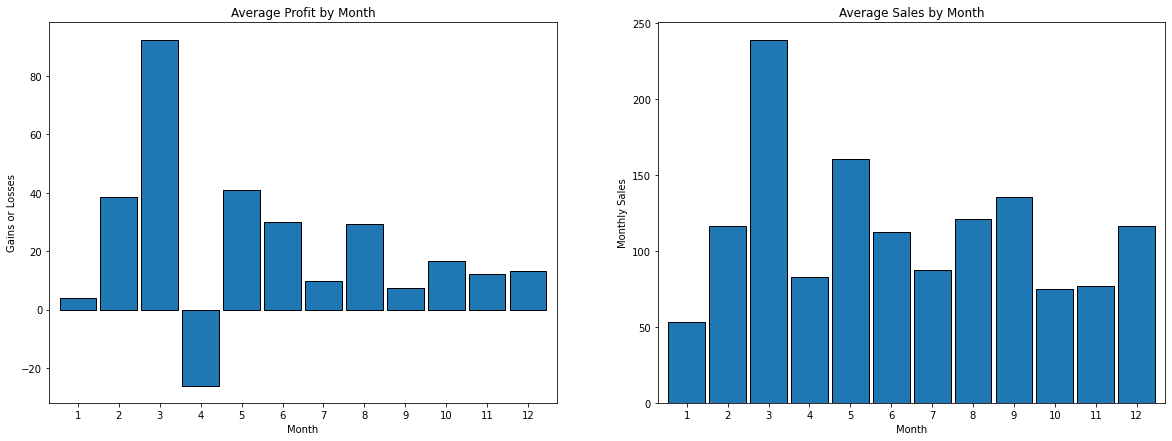

In [44]:
# Checking profit and sales in office supplies side by side
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = office_supplies.profit

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Month', xlabel='Month', ylabel='Gains or Losses')

plt.subplot(1, 2, 2)
y2 = office_supplies.sales

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Monthly Sales')

In [45]:
train.month.value_counts()
# Wait, how can we have the most sales over all according to this chart in March when it so seldomly appears in frequency? 

December     171
November     166
September    163
April        113
June         105
May           96
August        96
October       88
July          85
March         73
January       46
February      36
Name: month, dtype: int64

[Text(0.5, 1.0, 'Average Sales Per Product by Month OFFICE SUPPLIES ONLY'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

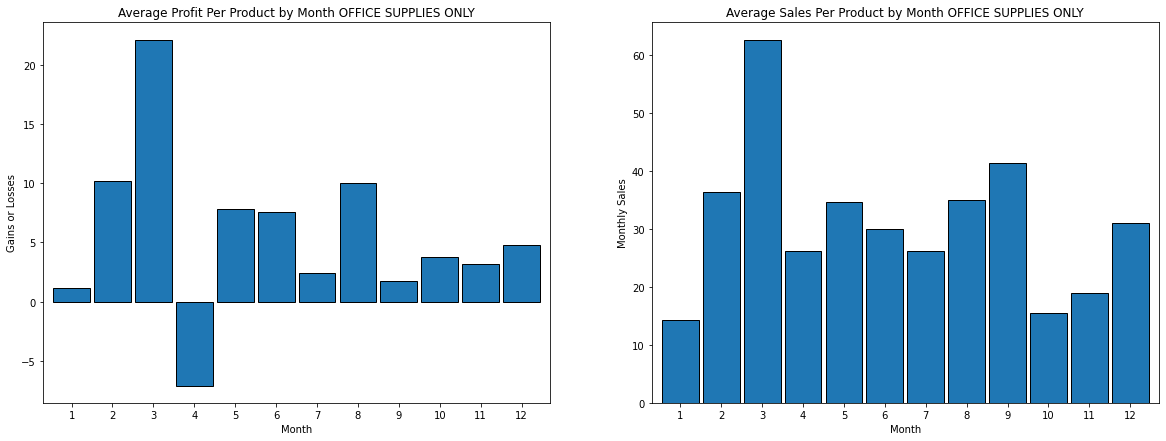

In [53]:
# Checking profit and sales in office supplies side by side
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = office_supplies.profit_per_product

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit Per Product by Month OFFICE SUPPLIES ONLY', xlabel='Month', ylabel='Gains or Losses')

plt.subplot(1, 2, 2)
y2 = office_supplies.sales_per_product

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Per Product by Month OFFICE SUPPLIES ONLY', xlabel='Month', ylabel='Monthly Sales')

[Text(0.5, 1.0, 'Average Sales by Year OFFICE SUPPLIES'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Annual Sales OFFICE SUPPLIES')]

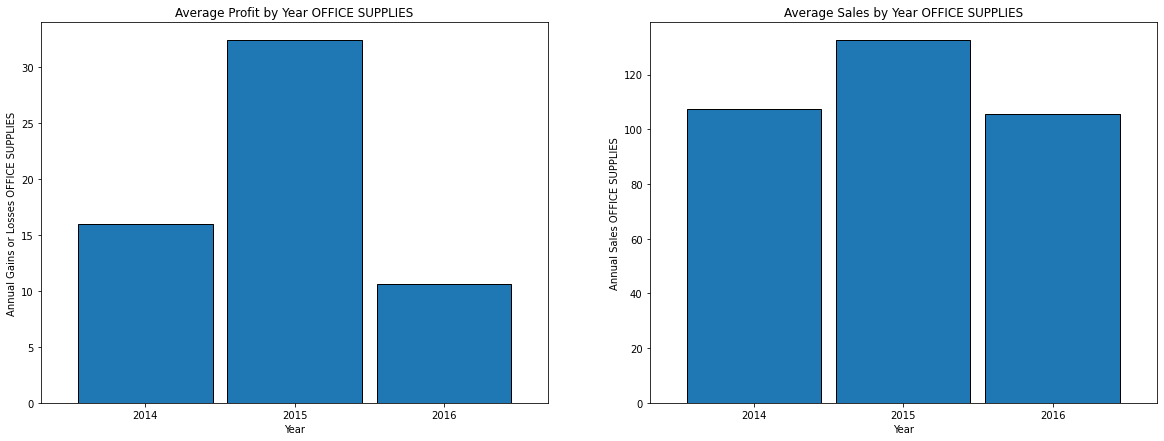

In [49]:
# Checking profit and sales in office supplies side by side
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = office_supplies.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year OFFICE SUPPLIES', xlabel='Year', ylabel='Annual Gains or Losses OFFICE SUPPLIES')

plt.subplot(1, 2, 2)
y2 = office_supplies.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year OFFICE SUPPLIES', xlabel='Year', ylabel='Annual Sales OFFICE SUPPLIES')

In [ ]:
# So are well selling more but profiting less? We are definitely selling more, so why aren't we making more? 

[Text(0.5, 1.0, 'Average Sales Per Product by Month FURNITURE ONLY'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

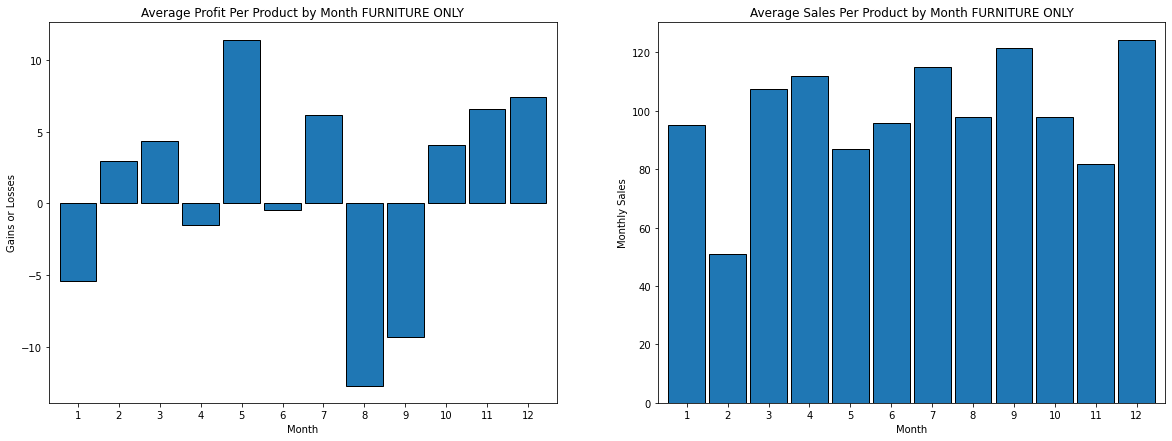

In [54]:
# Checking profit and sales per product monthly for furniture, side by side
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = furniture.profit_per_product

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit Per Product by Month FURNITURE ONLY', xlabel='Month', ylabel='Gains or Losses')

plt.subplot(1, 2, 2)
y2 = furniture.sales_per_product

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Per Product by Month FURNITURE ONLY', xlabel='Month', ylabel='Monthly Sales')

[Text(0.5, 1.0, 'Average Sales by Year FURNITURE ONLY'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Annual Sales FURNITURE')]

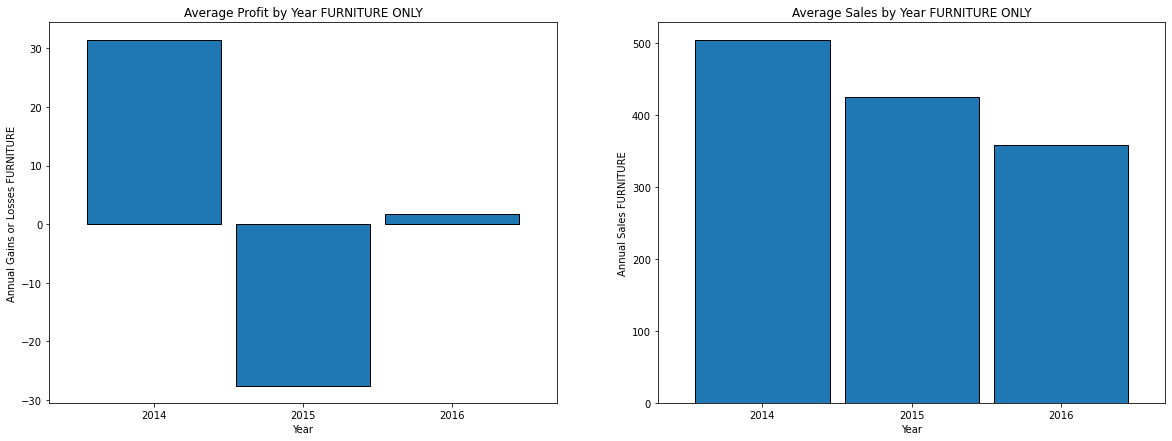

In [55]:
# Checking overall profit and sales in furniture side by side
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = furniture.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Gains or Losses FURNITURE')

plt.subplot(1, 2, 2)
y2 = furniture.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year FURNITURE ONLY', xlabel='Year', ylabel='Annual Sales FURNITURE')

[Text(0.5, 1.0, 'Average Sales Per Product by Month TECHNOLOGY ONLY'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Sales')]

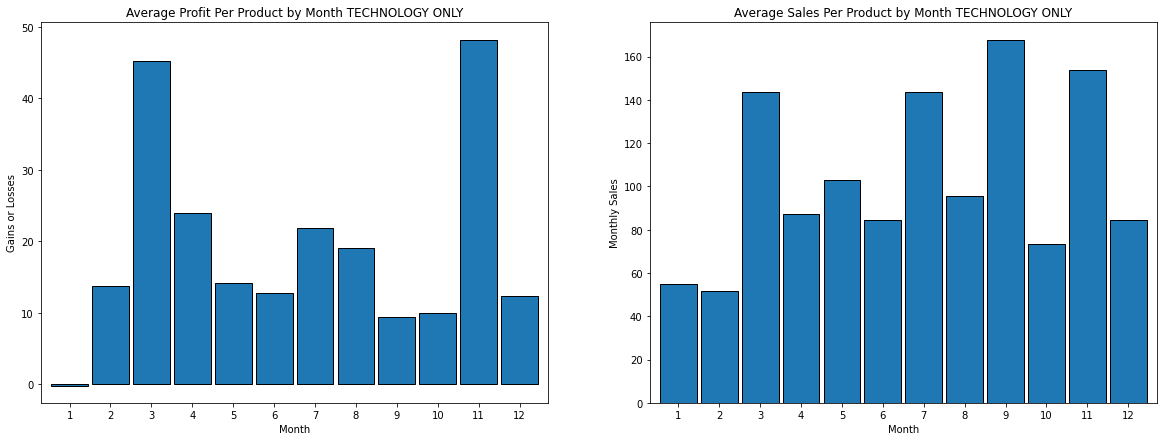

In [56]:
# Furniture is far from profitable. It's bleeding us dry. 
# Let's look at technology

# Checking profit and sales per product monthly for technology, side by side
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = technology.profit_per_product

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit Per Product by Month TECHNOLOGY ONLY', xlabel='Month', ylabel='Gains or Losses')

plt.subplot(1, 2, 2)
y2 = technology.sales_per_product

ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Per Product by Month TECHNOLOGY ONLY', xlabel='Month', ylabel='Monthly Sales')

[Text(0.5, 1.0, 'Average Sales by Year TECHNOLOGY ONLY'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Annual Sales TECHNOLOGY')]

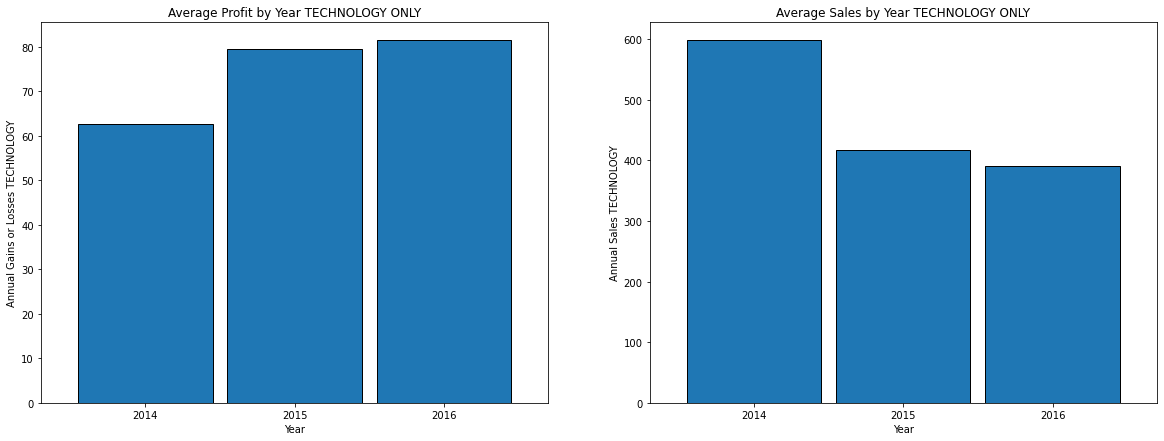

In [57]:
# Very consistent monthly profits for technology, in that we appear to never lose money. 
# Checking overall profit and sales in technology side by side
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(1, 2, 1)
y = technology.profit

ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Profit by Year TECHNOLOGY ONLY', xlabel='Year', ylabel='Annual Gains or Losses TECHNOLOGY')

plt.subplot(1, 2, 2)
y2 = technology.sales

ax = y2.groupby(y2.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Year TECHNOLOGY ONLY', xlabel='Year', ylabel='Annual Sales TECHNOLOGY')

In [ ]:
# Our profit is increasing, but our sales are dropping. 

In [87]:
# # May not use this at all, just setting it up for potential future use on seasonal decomposition
# 
office_supplies_sales = office_supplies['sales']
office_supplies_sales.index.is_unique
# False. We are dealing with duplicate values. 
office_supplies_sales.index.duplicated()

#weekly_office_supplies = office_supplies_sales.asfreq('W')
# 


array([False,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False,  True,

In [ ]:
rolling_df = office_supplies_sales.resample('W').mean().assign(
    rolling_3=lambda office_supplies_sales: office_supplies_sales.sales.rolling(3).mean(),
    rolling_5=lambda office_supplies_sales: office_supplies_sales.sales.rolling(5).mean(),
    rolling_7=lambda office_supplies_sales: office_supplies_sales.sales.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)